In [563]:
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import scipy as sp

import statsmodels.api as sm
import statsmodels.tsa.api as smt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [564]:
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [565]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [566]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [567]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [568]:
## drop unwanted columns
bike.drop(['instant','casual','registered','dteday'],axis=1, inplace=True)

In [569]:
bike.info()
## NO missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


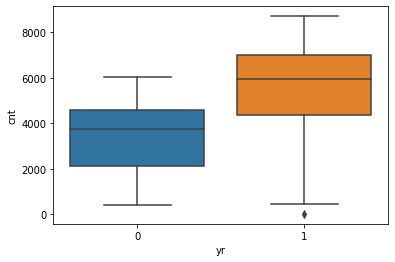

In [570]:
sns.boxplot(x="yr",y="cnt",data=bike)

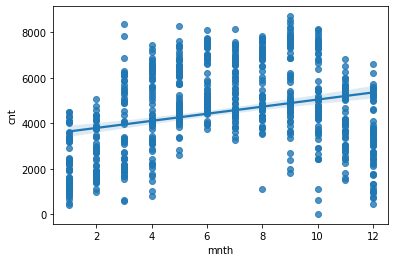

In [571]:
sns.regplot(x="mnth",y="cnt",data=bike)

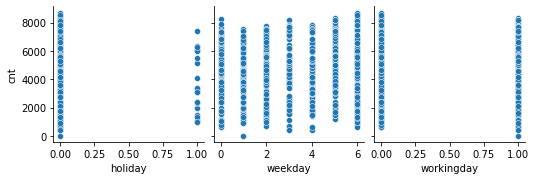

In [572]:
sns.pairplot(x_vars=["holiday","weekday","workingday"],y_vars="cnt",data=bike)

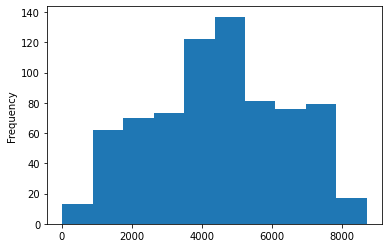

In [573]:
bike.cnt.plot(kind='hist')

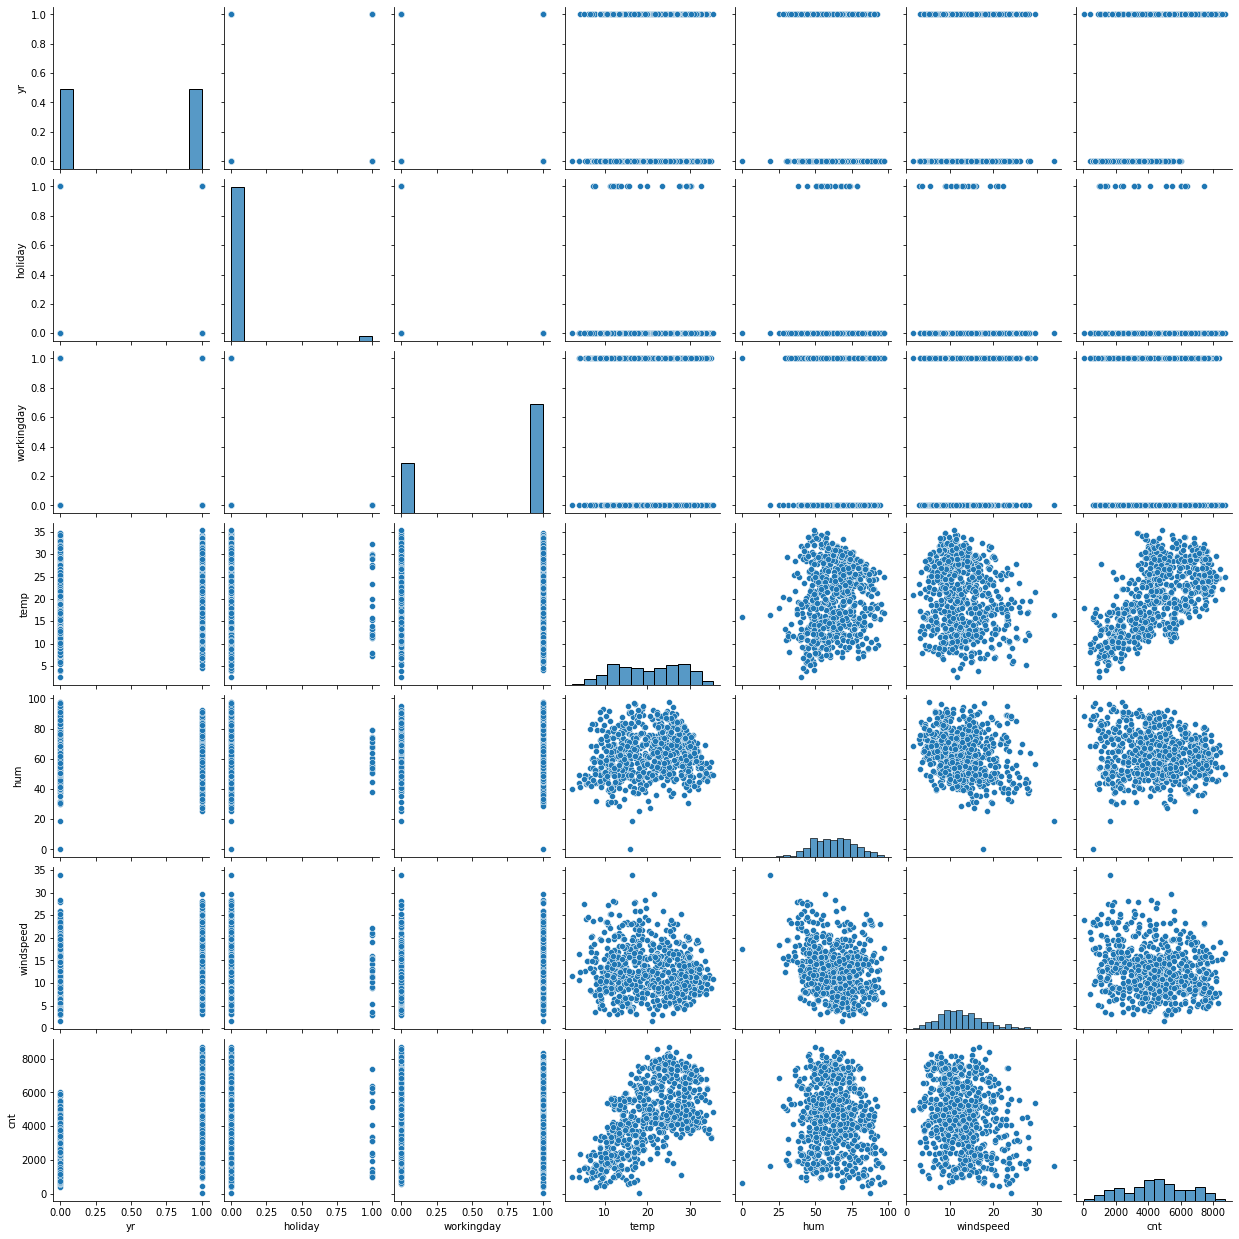

In [651]:
# visualize the numeric varibales - enable below two lines
sns.pairplot(bike)
plt.show()

In [575]:
# Encoding/mapping columns season/weekday/weathersit


bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike.mnth = bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

bike.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


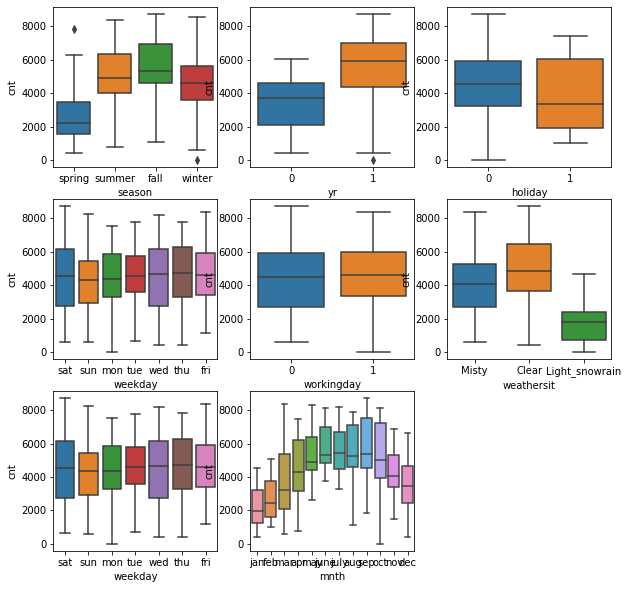

In [576]:
# visualize the categorical varibales


plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(x='season', y= 'cnt',data=bike)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y= 'cnt',data=bike)
plt.subplot(3,3,3)
sns.boxplot(x='holiday', y= 'cnt',data=bike)
plt.subplot(3,3,4)
sns.boxplot(x='weekday', y= 'cnt',data=bike)
plt.subplot(3,3,5)
sns.boxplot(x='workingday', y= 'cnt',data=bike)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit', y= 'cnt',data=bike)
plt.subplot(3,3,7)
sns.boxplot(x='weekday', y= 'cnt',data=bike)
plt.subplot(3,3,8)
sns.boxplot(x='mnth', y= 'cnt',data=bike)


Analysis from boxplots

1. fall season has max count
2. 2019 has higher rides
3. non holiday has high mean of ride takers 
4. week days 2-5 has relatively higher mean
5. working day has marginaly higher mean
6. clear weather has impressively higher ride taker then followed by mist and light snow. where as heavy rain is not in the picture. 



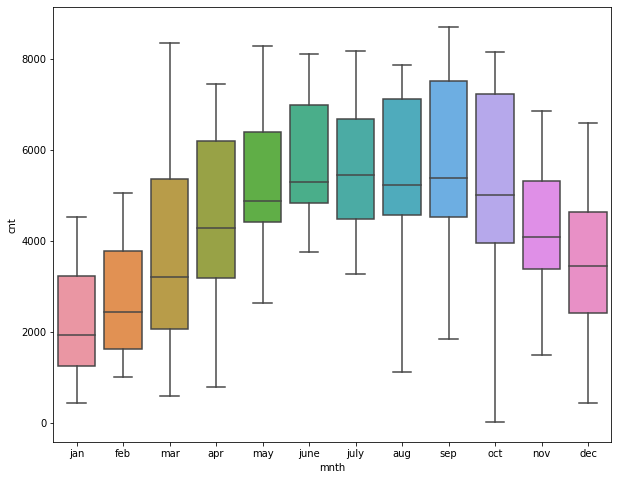

In [577]:
plt.figure(figsize=(10,8))

sns.boxplot(x='mnth', y= 'cnt',data=bike)

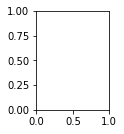

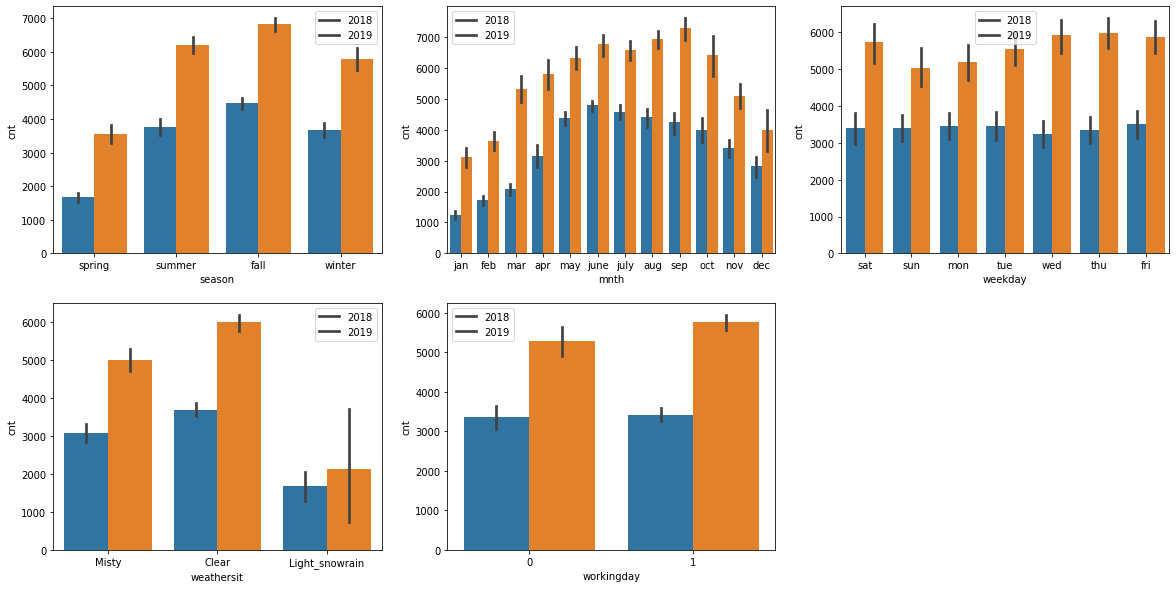

In [578]:
plt.subplot(2,4,1)
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.barplot('season','cnt',data=bike, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.subplot(2,3,2)
sns.barplot('mnth','cnt',data=bike, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.subplot(2,3,3)
sns.barplot('weekday','cnt',data=bike, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.subplot(2,3,4)
sns.barplot('weathersit','cnt',data=bike, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.subplot(2,3,5)
sns.barplot('workingday','cnt',data=bike, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()



1.   Here it is evident that during April to october there is very good demand for the rides during both years
2.   Summer and fall has more demand
3. all the weekday has similr demand
4. Misty and clear weather has higher demand
5. not much matter on working/nonworking day on the demand








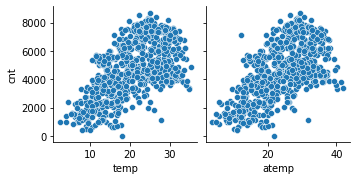

In [579]:
sns.pairplot(x_vars=["temp","atemp"],y_vars="cnt",data=bike)

temp and atemp has similar pattern or effect on the total count hence we can drop atemp - applying RFE here


No encoding required ... as all numerical veriables

In [580]:
bike.drop(['atemp'],axis=1, inplace=True)

In [581]:
#dDummy varibale additions

mnth_bike=pd.get_dummies(bike.mnth,drop_first=True)
weekdays_bike=pd.get_dummies(bike.weekday,drop_first=True)
weathersit_bike=pd.get_dummies(bike.weathersit,drop_first=True)
seasons_bike=pd.get_dummies(bike.season,drop_first=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


In [582]:
cor = bike.corr()
cor

,yr,holiday,workingday,temp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.128565,-0.158186,0.627044
hum,-0.112547,-0.015662,0.023202,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,-0.098543,-0.235132,1.000000


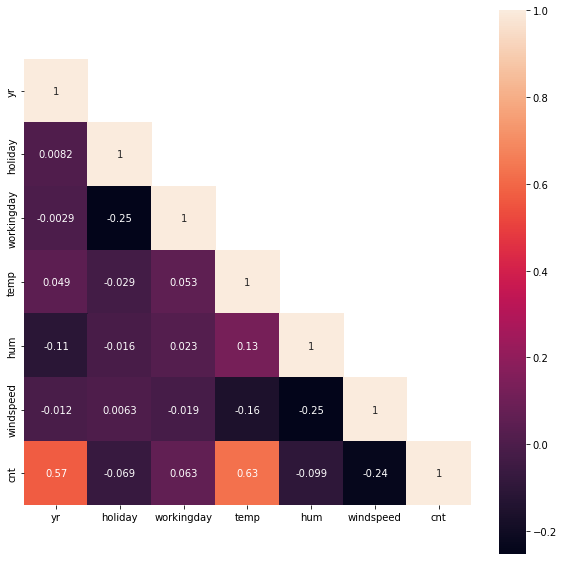

In [583]:
# heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=1, square=True,annot=True)

In [584]:
# add the dummy variable dataset. 
bike_new = pd.concat([bike,mnth_bike,weekdays_bike,weathersit_bike,seasons_bike],axis=1)
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [585]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   hum             730 non-null    float64
 9   windspeed       730 non-null    float64
 10  cnt             730 non-null    int64  
 11  aug             730 non-null    uint8  
 12  dec             730 non-null    uint8  
 13  feb             730 non-null    uint8  
 14  jan             730 non-null    uint8  
 15  july            730 non-null    uint8  
 16  june            730 non-null    uint8  
 17  mar             730 non-null    uin

In [586]:
# drop the original columsn

bike_new.drop(['mnth','season','weekday','weathersit'], axis = 1, inplace = True)



In [587]:
bike_new.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [588]:
# Split the dataframe into train and test sets using skikit
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size=0.8, test_size=0.2, random_state=100)

In [589]:
df_train.shape , df_test.shape

((584, 29), (146, 29))

In [590]:
df_train_backup1 = df_train
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
367,1,0,1,6.150000,44.1250,24.499957,2236,0,0,0,...,0,0,0,1,0,0,0,1,0,0
648,1,0,1,17.835000,46.3333,12.166932,7570,0,0,0,...,0,0,1,0,0,0,0,0,0,1
44,0,0,1,17.015000,37.5833,27.999836,1913,0,0,1,...,0,0,0,0,0,0,0,1,0,0
705,1,0,1,13.154153,76.4167,8.750200,5008,0,1,0,...,0,0,0,0,0,0,1,0,0,1
379,1,0,0,6.833347,41.9167,16.834286,2311,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,30.852500,65.9583,8.666718,7261,1,0,0,...,0,0,1,0,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,1917,0,0,1,...,0,0,0,0,1,0,0,1,0,0
350,0,0,0,10.591653,56.0833,16.292189,2739,0,1,0,...,1,0,0,0,0,0,1,0,0,1
79,0,0,1,17.647835,73.7391,19.348461,2077,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [591]:
# fit tranform except  y/n dummi and 1/0
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
367,1,0,1,0.113228,0.454701,0.695175,0.254717,0,0,0,...,0,0,0,1,0,0,0,1,0,0
648,1,0,1,0.468352,0.477458,0.299450,0.868385,0,0,0,...,0,0,1,0,0,0,0,0,0,1
44,0,0,1,0.443431,0.387290,0.807474,0.217556,0,0,1,...,0,0,0,0,0,0,0,1,0,0
705,1,0,1,0.326094,0.787463,0.189819,0.573631,0,1,0,...,0,0,0,0,0,0,1,0,0,1
379,1,0,0,0.133996,0.431945,0.449210,0.263346,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0.832835,1,0,0,...,0,0,1,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.218017,0,0,1,...,0,0,0,0,1,0,0,1,0,0
350,0,0,0,0.248216,0.577930,0.431816,0.312586,0,1,0,...,1,0,0,0,0,0,1,0,0,1
79,0,0,1,0.462664,0.759870,0.529881,0.236424,0,0,0,...,0,0,0,0,0,0,1,0,1,0


<Figure size 1800x1800 with 0 Axes>

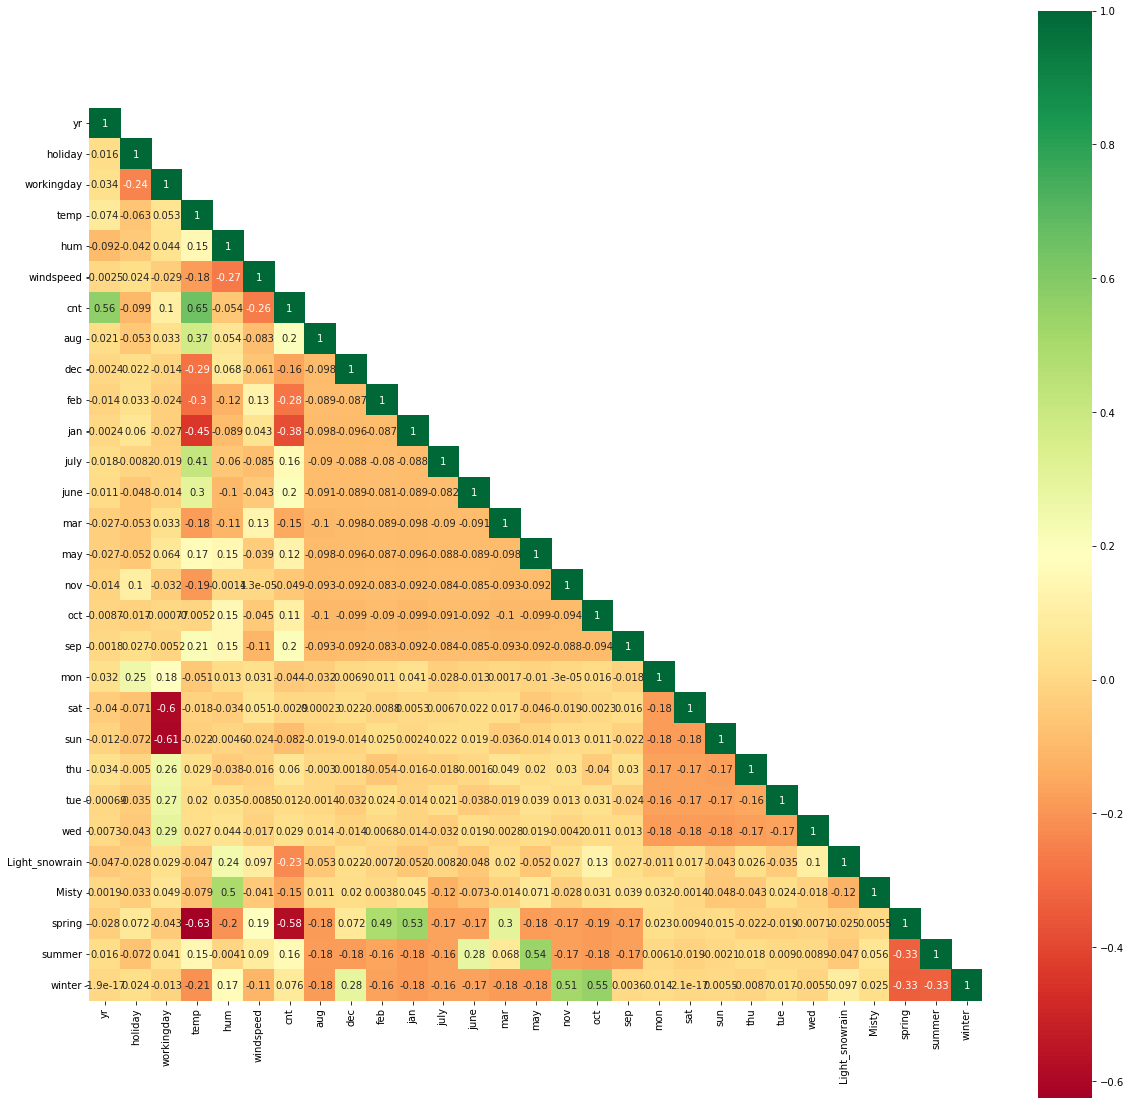

In [592]:
## cheacking the heat map for correlations

cor = df_train.corr()

plt.figure(figsize = (25,25))
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(cor, mask=mask,vmax=1, square=True,annot=True, cmap="RdYlGn")


following correlation noticed
1. cnt - to year and temp 
2. temp - july month
3. misty and humidity
4. spring - feb and jan
5. summer - may
6. winter -  November and october

In [593]:
y_train = df_train['cnt']
X_train = df_train.drop(['cnt'],axis=1)
y_test = df_test['cnt']
X_test = df_test.drop(['cnt'],axis=1)

import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 367 to 520
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              584 non-null    int64  
 1   holiday         584 non-null    int64  
 2   workingday      584 non-null    int64  
 3   temp            584 non-null    float64
 4   hum             584 non-null    float64
 5   windspeed       584 non-null    float64
 6   aug             584 non-null    uint8  
 7   dec             584 non-null    uint8  
 8   feb             584 non-null    uint8  
 9   jan             584 non-null    uint8  
 10  july            584 non-null    uint8  
 11  june            584 non-null    uint8  
 12  mar             584 non-null    uint8  
 13  may             584 non-null    uint8  
 14  nov             584 non-null    uint8  
 15  oct             584 non-null    uint8  
 16  sep             584 non-null    uint8  
 17  mon             584 non-null    u

#identifying the contant and intersect 

In [594]:
X_train_lm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
367,1.0,1,0,1,0.113228,0.454701,0.695175,0,0,0,...,0,0,0,1,0,0,0,1,0,0
648,1.0,1,0,1,0.468352,0.477458,0.299450,0,0,0,...,0,0,1,0,0,0,0,0,0,1
44,1.0,0,0,1,0.443431,0.387290,0.807474,0,0,1,...,0,0,0,0,0,0,0,1,0,0
705,1.0,1,0,1,0.326094,0.787463,0.189819,0,1,0,...,0,0,0,0,0,0,1,0,0,1
379,1.0,1,0,0,0.133996,0.431945,0.449210,0,0,0,...,0,1,0,0,0,0,0,1,0,0


Fitting the model and learning using OLS [ ordinary least squires ] .. 
midified version of the object X_train_lm


In [595]:
lr = sm.OLS(y_train, X_train_lm.astype(float)).fit()
lr.params

const             0.241453
yr                0.229189
holiday           0.008135
workingday        0.099964
temp              0.448013
hum              -0.143536
windspeed        -0.181640
aug               0.016600
dec              -0.052090
feb              -0.028861
jan              -0.059194
july             -0.035010
june              0.009032
mar               0.002594
may               0.017965
nov              -0.050449
oct               0.012846
sep               0.076986
mon              -0.024021
sat               0.096953
sun               0.036400
thu              -0.009520
tue              -0.022671
wed              -0.007090
Light_snowrain   -0.263616
Misty            -0.059263
spring           -0.055823
summer            0.042038
winter            0.108931
dtype: float64

R2 of .85 is good number and doing well on the training set

In [596]:
#   function for  VIF of 

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 
#   function for  LR
def reggression_model(X_train,y_train):
  X_train_lm = sm.add_constant(X_train)
  lr_1 = sm.OLS(y_train,X_train_lm).fit()
  print(lr_1.summary())
  

In [597]:
#1st LR

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     125.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.29e-216
Time:                        14:54:10   Log-Likelihood:                 613.13
No. Observations:                 584   AIC:                            -1170.
Df Residuals:                     556   BIC:                            -1048.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2415      0.033      7.

Model is not very confident on Light_snowrain  and hum

Calculate vif

In [598]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#vif = pd.DataFrame()
#vif['features'] = X_train.columns
#vif['VIF']= [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1]) ]

#vif['VIF']=  round(vif['VIF'],2)
#vif =vif.sort_values(by = 'VIF', ascending =False)
#vif
calculateVIF(X_train)


,Features,VIF
2,workingday,88.20
19,sun,20.33
18,sat,19.90
25,spring,10.82
27,winter,8.83
26,summer,8.31
3,temp,7.01
15,oct,6.83
14,nov,6.39
6,aug,6.06


let us drop high RFE items 
1. working day


In [599]:
X_train = X_train.drop(['workingday'], axis=1)

calculateVIF(X_train)

,Features,VIF
3,hum,39.01
2,temp,36.93
24,spring,11.96
26,winter,10.95
25,summer,6.84
14,oct,6.59
13,nov,5.61
5,aug,5.44
8,jan,5.34
4,windspeed,5.10


In [600]:
# 2nd LR model
reggression_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     125.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.29e-216
Time:                        14:54:10   Log-Likelihood:                 613.13
No. Observations:                 584   AIC:                            -1170.
Df Residuals:                     556   BIC:                            -1048.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3414      0.041      8.

In [601]:
#drop mar
X_train = X_train.drop(['mar'], axis=1)

calculateVIF(X_train)


,Features,VIF
2,temp,36.93
3,hum,36.83
25,winter,9.78
23,spring,8.21
24,summer,6.84
5,aug,5.14
13,oct,5.08
4,windspeed,5.06
9,july,4.82
12,nov,4.36


In [602]:
# 3rd LR model
reggression_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     130.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.87e-217
Time:                        14:54:10   Log-Likelihood:                 613.12
No. Observations:                 584   AIC:                            -1172.
Df Residuals:                     557   BIC:                            -1054.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3431      0.038      8.

In [603]:
#drop June
X_train = X_train.drop(['june'], axis=1)

calculateVIF(X_train)

,Features,VIF
3,hum,36.47
2,temp,22.29
24,winter,9.54
22,spring,7.57
23,summer,6.58
4,windspeed,5.01
12,oct,4.80
11,nov,4.31
5,aug,3.31
6,dec,3.19


In [604]:
# 4rd LR model
reggression_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     135.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.63e-218
Time:                        14:54:10   Log-Likelihood:                 613.04
No. Observations:                 584   AIC:                            -1174.
Df Residuals:                     558   BIC:                            -1060.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3445      0.038      9.

In [605]:
#drop oct
X_train = X_train.drop(['oct'], axis=1)

calculateVIF(X_train)

,Features,VIF
3,hum,34.87
2,temp,22.27
21,spring,7.56
22,summer,5.91
23,winter,5.74
4,windspeed,4.96
5,aug,3.03
9,july,2.79
8,jan,2.42
20,Misty,2.39


In [606]:
# 5th LR model
reggression_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     141.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.30e-219
Time:                        14:54:10   Log-Likelihood:                 612.99
No. Observations:                 584   AIC:                            -1176.
Df Residuals:                     559   BIC:                            -1067.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3467      0.038      9.

In [607]:
#drop sat
X_train = X_train.drop(['sat'], axis=1)

calculateVIF(X_train)

,Features,VIF
3,hum,34.44
2,temp,21.87
20,spring,7.40
21,summer,5.79
22,winter,5.65
4,windspeed,4.90
5,aug,3.02
9,july,2.78
8,jan,2.41
19,Misty,2.37


In [608]:
# 6th LR model
reggression_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     147.6
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.91e-220
Time:                        14:54:11   Log-Likelihood:                 612.97
No. Observations:                 584   AIC:                            -1178.
Df Residuals:                     560   BIC:                            -1073.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3452      0.037      9.

In [609]:
#drop aug
X_train = X_train.drop(['aug'], axis=1)

calculateVIF(X_train)

,Features,VIF
3,hum,32.73
2,temp,19.14
19,spring,5.69
4,windspeed,4.81
21,winter,3.84
20,summer,3.39
7,jan,2.39
18,Misty,2.37
0,yr,2.13
6,feb,2.03


In [610]:
# 7th LR model
reggression_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     154.6
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.59e-221
Time:                        14:54:11   Log-Likelihood:                 612.92
No. Observations:                 584   AIC:                            -1180.
Df Residuals:                     561   BIC:                            -1079.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3488      0.035     10.

In [611]:
#drop wed
X_train = X_train.drop(['wed'], axis=1)

calculateVIF(X_train)

,Features,VIF
3,hum,32.49
2,temp,18.93
18,spring,5.66
4,windspeed,4.81
20,winter,3.83
19,summer,3.37
7,jan,2.39
17,Misty,2.36
0,yr,2.13
6,feb,2.03


In [612]:
# 8th LR model
reggression_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     162.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.38e-222
Time:                        14:54:11   Log-Likelihood:                 612.80
No. Observations:                 584   AIC:                            -1182.
Df Residuals:                     562   BIC:                            -1085.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3475      0.035     10.

In [613]:
#drop thu
X_train = X_train.drop(['thu'], axis=1)

calculateVIF(X_train)


,Features,VIF
3,hum,32.47
2,temp,18.79
17,spring,5.62
4,windspeed,4.81
19,winter,3.82
18,summer,3.35
7,jan,2.39
16,Misty,2.36
0,yr,2.13
6,feb,2.03


In [614]:
# 9th LR model
reggression_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     170.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.21e-223
Time:                        14:54:11   Log-Likelihood:                 612.64
No. Observations:                 584   AIC:                            -1183.
Df Residuals:                     563   BIC:                            -1092.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3460      0.035     10.

In [615]:
#drop may
X_train = X_train.drop(['may'], axis=1)

calculateVIF(X_train)

,Features,VIF
3,hum,32.44
2,temp,18.74
16,spring,5.62
4,windspeed,4.72
18,winter,3.82
17,summer,2.82
7,jan,2.39
15,Misty,2.36
0,yr,2.12
6,feb,2.03


In [616]:
# 10th LR model
reggression_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     179.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.30e-224
Time:                        14:54:11   Log-Likelihood:                 612.26
No. Observations:                 584   AIC:                            -1185.
Df Residuals:                     564   BIC:                            -1097.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3397      0.034     10.

In [617]:
#drop tue
X_train = X_train.drop(['tue'], axis=1)

calculateVIF(X_train)

,Features,VIF
3,hum,32.24
2,temp,18.74
15,spring,5.62
4,windspeed,4.72
17,winter,3.81
16,summer,2.82
7,jan,2.39
14,Misty,2.36
0,yr,2.12
6,feb,2.03


In [618]:
# 11th LR model
reggression_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     188.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.32e-225
Time:                        14:54:11   Log-Likelihood:                 610.93
No. Observations:                 584   AIC:                            -1184.
Df Residuals:                     565   BIC:                            -1101.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3385      0.034     10.

In [619]:
#drop mon
X_train = X_train.drop(['mon'], axis=1)

calculateVIF(X_train)

,Features,VIF
3,hum,32.09
2,temp,18.73
14,spring,5.62
4,windspeed,4.71
16,winter,3.81
15,summer,2.81
7,jan,2.39
13,Misty,2.36
0,yr,2.11
6,feb,2.03


In [620]:
# 12th LR model
reggression_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     199.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          6.98e-226
Time:                        14:54:11   Log-Likelihood:                 609.78
No. Observations:                 584   AIC:                            -1184.
Df Residuals:                     566   BIC:                            -1105.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3361      0.034      9.

In [621]:
#drop feb
X_train = X_train.drop(['feb'], axis=1)

calculateVIF(X_train)

,Features,VIF
3,hum,31.43
2,temp,18.16
4,windspeed,4.70
13,spring,4.44
15,winter,3.81
14,summer,2.81
12,Misty,2.35
0,yr,2.11
8,nov,1.74
6,jan,1.71


In [622]:
# 13th LR model
reggression_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     210.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.09e-226
Time:                        14:54:12   Log-Likelihood:                 608.24
No. Observations:                 584   AIC:                            -1182.
Df Residuals:                     567   BIC:                            -1108.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3261      0.033      9.

****

*   All P values are in acceptable level
*   VIF value Hum is high



In [623]:
#drop hum
X_train = X_train.drop(['hum'], axis=1)

calculateVIF(X_train)

,Features,VIF
2,temp,5.40
3,windspeed,4.65
12,spring,2.91
14,winter,2.80
13,summer,2.29
0,yr,2.08
7,nov,1.69
5,jan,1.62
6,july,1.62
11,Misty,1.56


In [624]:
# 14th LR model
reggression_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     217.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          8.53e-224
Time:                        14:54:12   Log-Likelihood:                 599.22
No. Observations:                 584   AIC:                            -1166.
Df Residuals:                     568   BIC:                            -1097.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2557      0.029      8.

In [625]:
# 15th LR model
reggression_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     217.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          8.53e-224
Time:                        14:54:12   Log-Likelihood:                 599.22
No. Observations:                 584   AIC:                            -1166.
Df Residuals:                     568   BIC:                            -1097.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2557      0.029      8.

In [626]:
#drop Winter
X_train = X_train.drop(['winter'], axis=1)

calculateVIF(X_train)


,Features,VIF
2,temp,5.18
3,windspeed,4.45
12,spring,2.46
0,yr,2.06
13,summer,1.94
5,jan,1.60
11,Misty,1.53
6,july,1.50
8,sep,1.35
7,nov,1.24


In [627]:
# 16th LR model
reggression_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     215.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          7.64e-217
Time:                        14:54:12   Log-Likelihood:                 579.90
No. Observations:                 584   AIC:                            -1130.
Df Residuals:                     569   BIC:                            -1064.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3722      0.023     15.

In [628]:
#drop july
X_train = X_train.drop(['july'], axis=1)

calculateVIF(X_train)


,Features,VIF
3,windspeed,4.45
2,temp,4.02
11,spring,2.42
0,yr,2.06
12,summer,1.73
5,jan,1.60
10,Misty,1.51
7,sep,1.24
6,nov,1.21
8,sun,1.18


In [629]:
# drop Nov

X_train = X_train.drop(['nov'], axis=1)


In [631]:
# drop sep
X_train = X_train.drop(['sep'], axis=1)

In [637]:
# drop jan
X_train = X_train.drop(['jan'], axis=1)

In [638]:
# 17th LR model [ final model]
X_train_17th = X_train
X_train_lm_17 = sm.add_constant(X_train)
lr_17 = sm.OLS(y_train,X_train_lm_17).fit()
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     272.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.61e-210
Time:                        14:58:11   Log-Likelihood:                 553.52
No. Observations:                 584   AIC:                            -1085.
Df Residuals:                     573   BIC:                            -1037.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3510      0.019     18.

Analysis  on 17th LR


1.   F = 254.0 >1 
2.   P =4.42e-212 => near to zero


It is a good model now


Residual analysis

**prediction and evaluation of the test set**

predict/calculate y_train_pred and res value 

In [639]:
y_train_pred = lr_17.predict(X_train_lm_17)
y_train_pred

367    0.345581
648    0.700272
44     0.209264
705    0.564195
379    0.336488
         ...   
578    0.856289
53     0.236415
350    0.264734
79     0.344679
520    0.653514
Length: 584, dtype: float64

In [640]:
res = y_train - y_train_pred

Text(0.5, 1.0, 'residual analisys')

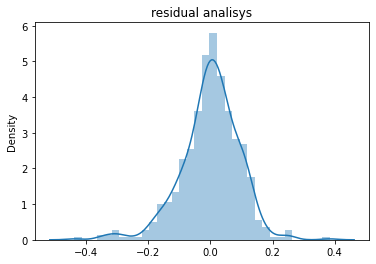

In [641]:
plt.figure()
sns.distplot(res)
plt.title("residual analisys")

residual analysis :- folowing a normal distribution . and regression is respected in this case




multicolliniarity

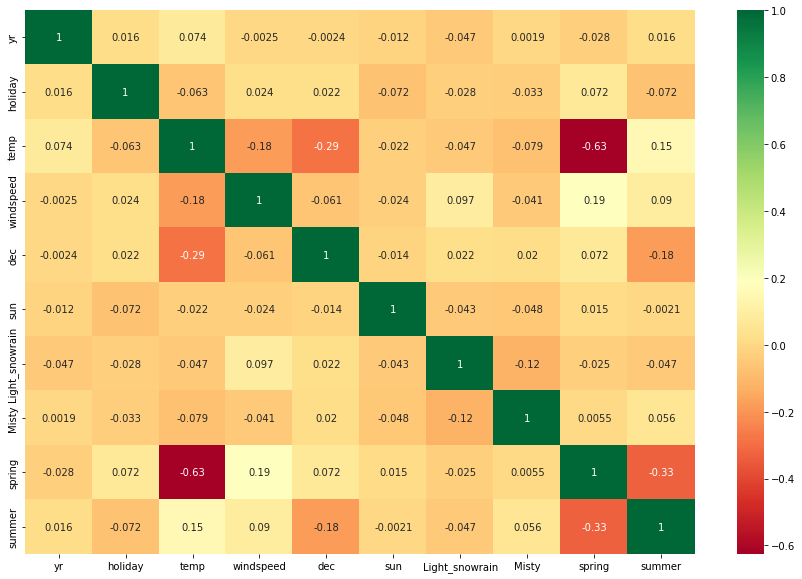

In [642]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot = True, cmap="RdYlGn")
plt.show()

evaluate the model

In [643]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [644]:
# rescale test data sets

num_vars = ['temp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()



,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [645]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,0.746575,0.569603,0.635933,0.315127,0.517368,0.061644,0.075342,0.089041,...,0.116438,0.102740,0.171233,0.178082,0.089041,0.034247,0.315068,0.226027,0.273973,0.219178
std,0.498699,0.182488,0.436469,0.238088,0.156357,0.161524,0.212757,0.241335,0.264852,0.285783,...,0.321854,0.304664,0.378009,0.383899,0.285783,0.182488,0.466142,0.419697,0.447530,0.415114
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.055683,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.250000,0.359075,0.534457,0.196160,0.391251,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.560248,0.614856,0.306383,0.508916,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.801929,0.730570,0.411976,0.649994,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.800793,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [646]:
y_test = df_test.pop('cnt')
X_test = df_test


col1 = X_train_17th.columns

X_test = X_test[col1]

X_test_lm_17 = sm.add_constant(X_test)

y_pred = lr_17.predict(X_test_lm_17)

r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7669

Text(0, 0.5, 'y_pred')

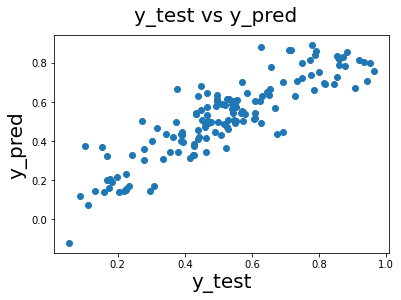

In [647]:
# y_test vs y_pred

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 20)
plt.ylabel('y_pred', fontsize = 20) 

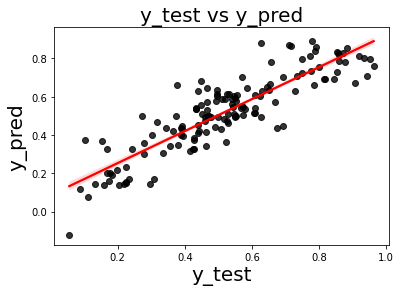

In [648]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=20)
plt.ylabel('y_pred', fontsize=20)
plt.show()

In [650]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7496


- Train dataset R^2          : 0.826
- Test dataset R^2           : 0.766


- Train dataset Adjusted R^2 :0.823    
- Test dataset Adjusted R^2  : 0.749